<a href="https://colab.research.google.com/github/Jesus-Antonio-Ramirez-Montes-2077626/Artificia_Intelligence/blob/main/PIA_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import glob
from PIL import Image
from tensorflow import keras
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

Libraries

In [2]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Kaggle

In [3]:
!kaggle datasets download -d sartajbhuvaji/brain-tumor-classification-mri

100% 86.8M/86.8M [00:03<00:00, 26.4MB/s]
100% 86.8M/86.8M [00:03<00:00, 22.9MB/s]


API command from Kaggle

In [4]:
!unzip -o 'archive (3).zip'

Archive:  archive (3).zip
  inflating: Testing/glioma_tumor/image(1).jpg  
  inflating: Testing/glioma_tumor/image(10).jpg  
  inflating: Testing/glioma_tumor/image(100).jpg  
  inflating: Testing/glioma_tumor/image(11).jpg  
  inflating: Testing/glioma_tumor/image(12).jpg  
  inflating: Testing/glioma_tumor/image(13).jpg  
  inflating: Testing/glioma_tumor/image(14).jpg  
  inflating: Testing/glioma_tumor/image(15).jpg  
  inflating: Testing/glioma_tumor/image(16).jpg  
  inflating: Testing/glioma_tumor/image(17).jpg  
  inflating: Testing/glioma_tumor/image(18).jpg  
  inflating: Testing/glioma_tumor/image(19).jpg  
  inflating: Testing/glioma_tumor/image(2).jpg  
  inflating: Testing/glioma_tumor/image(20).jpg  
  inflating: Testing/glioma_tumor/image(21).jpg  
  inflating: Testing/glioma_tumor/image(22).jpg  
  inflating: Testing/glioma_tumor/image(23).jpg  
  inflating: Testing/glioma_tumor/image(24).jpg  
  inflating: Testing/glioma_tumor/image(25).jpg  
  inflating: Testing/glio

Unzipping all the images of the dataset

In [20]:
folder_paths={'glioma':'/content/Training/glioma_tumor',
              'meningioma':'/content/Training/meningioma_tumor',
              'adenoma':'/content/Training/pituitary_tumor',
              'nothing':'/content/Training/no_tumor'}

images=[]
labels=[]
class_names=['glioma','meningioma','adenoma','nothing']

for label, folder_path in folder_paths.items():
  image_files=glob.glob(folder_path+'/*.jpg')
  for image_file in image_files:
    print(label)
    image=Image.open(image_file)
    image=image.resize((120,120))
    images.append(np.array(image))
    labels.append(class_names.index(label))
print(len(images))
print(len(labels))

glioma
glioma
glioma
glioma
glioma
glioma
glioma
glioma
glioma
glioma
glioma
glioma
glioma
glioma
glioma
glioma
glioma
glioma
glioma
glioma
glioma
glioma
glioma
glioma
glioma
glioma
glioma
glioma
glioma
glioma
glioma
glioma
glioma
glioma
glioma
glioma
glioma
glioma
glioma
glioma
glioma
glioma
glioma
glioma
glioma
glioma
glioma
glioma
glioma
glioma
glioma
glioma
glioma
glioma
glioma
glioma
glioma
glioma
glioma
glioma
glioma
glioma
glioma
glioma
glioma
glioma
glioma
glioma
glioma
glioma
glioma
glioma
glioma
glioma
glioma
glioma
glioma
glioma
glioma
glioma
glioma
glioma
glioma
glioma
glioma
glioma
glioma
glioma
glioma
glioma
glioma
glioma
glioma
glioma
glioma
glioma
glioma
glioma
glioma
glioma
glioma
glioma
glioma
glioma
glioma
glioma
glioma
glioma
glioma
glioma
glioma
glioma
glioma
glioma
glioma
glioma
glioma
glioma
glioma
glioma
glioma
glioma
glioma
glioma
glioma
glioma
glioma
glioma
glioma
glioma
glioma
glioma
glioma
glioma
glioma
glioma
glioma
glioma
glioma
glioma
glioma
glioma
glioma

Preprocessing (labeling and rescaling of images)

In [21]:
train_images,test_images,train_labels,test_labels=train_test_split(images,labels,test_size=0.2,random_state=42)

Dividing the images into train and test

In [22]:
train_images=np.array(train_images)/255
test_images=np.array(test_images)/255
train_labels=np.array(train_labels)
test_labels=np.array(test_labels)

Normalization of the images

In [27]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(120, 120, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(class_names), activation='softmax')
])

Main structure of the network

In [28]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Compiling of the model

In [29]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
72/72 [==============================] - 75s 1s/step - loss: 0.9868 - accuracy: 0.5767 - val_loss: 0.8371 - val_accuracy: 0.6463
Epoch 2/10
72/72 [==============================] - 68s 940ms/step - loss: 0.5629 - accuracy: 0.7700 - val_loss: 0.5158 - val_accuracy: 0.8014
Epoch 3/10
72/72 [==============================] - 67s 925ms/step - loss: 0.3763 - accuracy: 0.8602 - val_loss: 0.4311 - val_accuracy: 0.8380
Epoch 4/10
72/72 [==============================] - 67s 938ms/step - loss: 0.2463 - accuracy: 0.9138 - val_loss: 0.3927 - val_accuracy: 0.8641
Epoch 5/10
72/72 [==============================] - 69s 959ms/step - loss: 0.1430 - accuracy: 0.9495 - val_loss: 0.5670 - val_accuracy: 0.8258
Epoch 6/10
72/72 [==============================] - 70s 980ms/step - loss: 0.1118 - accuracy: 0.9547 - val_loss: 0.3687 - val_accuracy: 0.8885
Epoch 7/10
72/72 [==============================] - 69s 967ms/step - loss: 0.0597 - accuracy: 0.9782 - val_loss: 0.6623 - val_accuracy: 0.8537
Ep

Training epochs of the neural networks

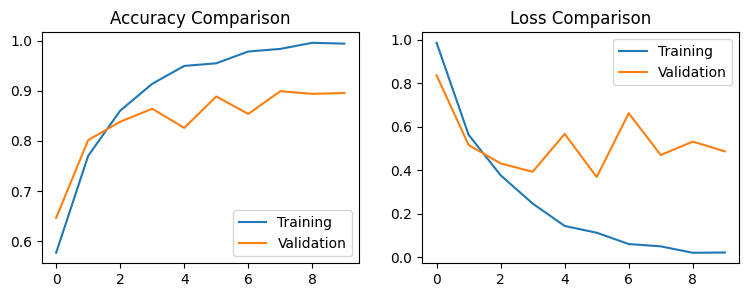

In [32]:
plt.figure(figsize=(9, 3))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.legend(loc='lower right')
plt.title('Accuracy Comparison')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validation')
plt.legend(loc='upper right')
plt.title('Loss Comparison')
plt.show()

Graphics comparing the accuracy and loss between training and validation

In [52]:
def Boingo(test_images, test_labels, predictions, num_images=20):
    class_names = ['glioma', 'meningioma', 'adenoma', 'nothing']
    correct_count = 0

    plt.figure(figsize=(12, 12))
    for t in range(num_images):
        a = plt.subplot(5, 4, t + 1)
        a.imshow(test_images[t])
        actual_label = class_names[test_labels[t]]
        tohth_label = class_names[np.argmax(predictions[t])]
        if actual_label == tohth_label:
            correct_count += 1
        percentage = round(np.max(predictions[t]) * 100, 2)
        a.set_title(f'Actual label: {actual_label}\nPredicted label: {tohth_label} ({percentage}%)\n{"Good guess (°u°)" if actual_label == tohth_label else "Better luck next time (°n°)"}', color='lightseagreen' if actual_label == tohth_label else 'darkmagenta', fontsize=7)
        a.axis('off')

    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    plt.show()
    return correct_count

Creacting the function that shows the predictions

In [53]:
OBBA=model.predict(test_images)

18/18 [==============================] - 4s 200ms/step


Make the predictions

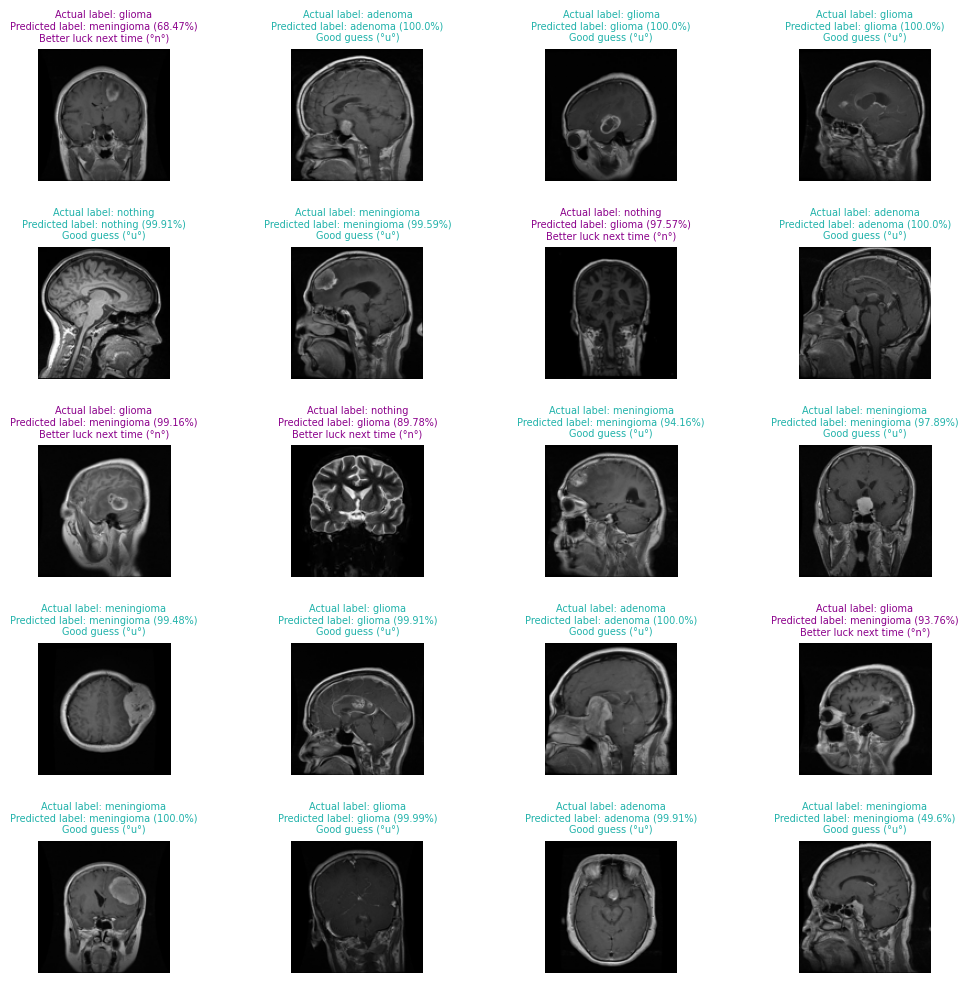

In [54]:
correct_count=Boingo(test_images,test_labels,OBBA, num_images=20)

Show predictions and success count

In [55]:
total_images=20
success_percentage=(correct_count/total_images)*100
print(f"global success percentage:{success_percentage:.2f}%")

global success percentage:75.00%
